#  Lab 1: Regression 
## Simple Linear Regression

In this notebook we are going to implement simple (one input) linear regression. You will be provided with some already complete code as well as some code that you should complete yourself. In particular, you will have to:
* Complete the function `paramEstimates` to implement linear regression algorithm.
* Complete the function `linearRegrNEWPredict` to implement linear regression algorithm.
* Complete the function `SSR` to compute the sum of squared residuals.



The required libraries for this notebook are pandas, sklearn, numpy and matplotlib.

In [1]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Hello


# Load the data
The data we are using is from ***regression data.csv***. It consists of 260 data points related to house prices where each data point has 9 features.

In [4]:
# Loading the CSV file
houseprice=pandas.read_csv('./datasets/regression_data.csv')
houseprice=houseprice[['Price (Older)', 'Price (New)']] # Choose 2 columns 


# Split data into training and testing

In [5]:
# Split the data
X=houseprice[['Price (Older)']]
Y=houseprice[['Price (New)']]

# Split the data into training and testing(75% training and 25% testing data)
xTrain,xTest,yTrain,yTest=train_test_split(X,Y)


# Use simple linear regression from a library

We will first see how simple linear regression can be implemented using built-in functions from the scikit-learn library.

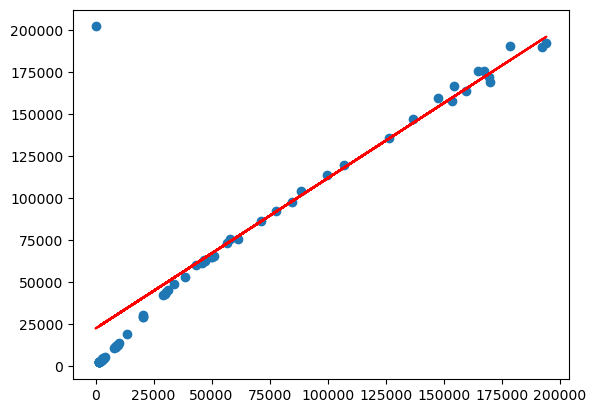

In [6]:
# sklearn functions implementation
def linearRegrPredict(xTrain, yTrain,xTest ):
    # Create linear regression object
    regr=LinearRegression()
    # Train the model using the training sets
    regr.fit(xTrain,yTrain)
    # Make predictions using the testing set
    y_pred = regr.predict(xTest)
    #print("Accuracy Score:",regr.score(xTest,yTest))
    return y_pred


y_pred = linearRegrPredict(xTrain, yTrain, xTest)


# Plot testing set predictions
plt.scatter(xTest, yTest)
plt.plot(xTest, y_pred, 'r-')
plt.show()



# Implement your own simple linear regression function 


You will be given the `paramEstimates(xTrain, yTrain)` function that estimates the linear regression parameters alpha and beta as follows:
\begin{align}
\hat{\beta} & =  \frac{\sum_{i=1}^n x_i\left(y_i - \bar{y} \right)}{\sum_{i=1}^n x_i\left(x_i - \bar{x} \right)}\\
\hat{\alpha} & = \bar{y}-\hat{\beta}\bar{x}
\end{align}

You have, however, to complete the `linearRegrNEWPredict(xTrain, yTrain, xTest)` function, or write your own, that returns the output variable y given the input x as follows: 
\begin{align}
\hat{y} & = \hat{\alpha}+\hat{\beta}x
\end{align}

***Remember that we train on `xTrain` and `yTrain`!***

In [52]:
# Transform dataframes to numpy arrays
xTrain1=np.array(xTrain.values).flatten()
xTest1=np.array(xTest.values).flatten()
yTrain1=np.array(yTrain.values).flatten()
yTest1=np.array(yTest.values).flatten()


22219.224351407516
0.8951208103919922


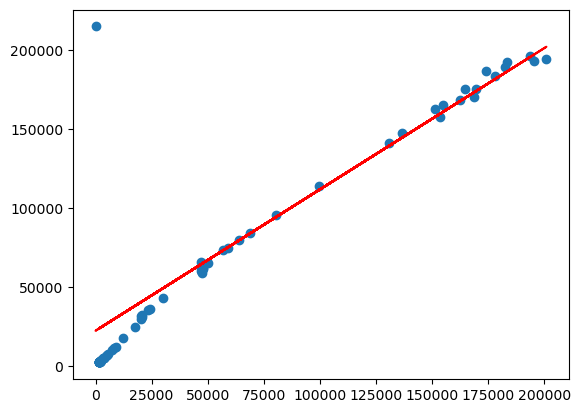

In [10]:
def paramEstimates(xTrain, yTrain):
    beta = np.sum(np.multiply(xTrain,(np.add(yTrain, -np.mean(yTrain))))) / np.sum(np.multiply(xTrain, (np.add(xTrain, - np.mean(xTrain)))))
    
    alpha = np.mean(yTrain) - beta*np.mean(xTrain)

    return alpha, beta


def linearRegrNEWPredict(xTrain, yTrain,xTest):
    alpha, beta = paramEstimates(xTrain, yTrain)
    print (alpha)
    print(beta)
    y_pred1 =  np.add(alpha, np.multiply(beta,xTest))


    return y_pred1

 
y_pred1=linearRegrNEWPredict(xTrain1, yTrain1,xTest1)


#Plot testing set predictions
plt.scatter(xTest, yTest)
plt.plot(xTest1, y_pred1, 'r-')
plt.show()



# Sum of Squared Residuals

You are now asked to write a simple function `SSR(y, y_pred)` that computes the sum of the squared
residuals (SSR). Remember that the SSR is the sum of the squares of the difference between the predicted outputs \\(\hat{y_i}\\) and the true output \\(y_i\\), as follows:
\begin{align}
SSR\left(y_i,\hat{y_i} \right) & =  \sum_{i=1}^n \left(y_i - \hat{y_i} \right)^2\\
\end{align}
Complete the following (or write your own) function to compute the SSR associated with the predictions delivered by your own or the library's implementation of simple linear regression.

In [11]:
def SSR(yTest, y_pred):
    ssr = np.sum(np.subtract(yTest, y_pred)**2)
    return ssr

y_pred_SSR = SSR(yTest,y_pred)
y_pred1_SSR = SSR(yTest1,y_pred1)

print("Scikit-learn linear regression SSR: %.4f" % y_pred_SSR)
print("Our implementation of linear regression SSR: %.4f" % y_pred1_SSR)


Scikit-learn linear regression SSR: 48832070508.9307
Our implementation of linear regression SSR: 48832070508.9306


/var/folders/kf/11922h0128jc1lsq8xpxlln80000gn/T/ipykernel_6592/249588434.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Scikit-learn linear regression SSR: %.4f" % y_pred_SSR)
